# Predicting Car Prices

In [83]:
import pandas as pd
import numpy as np

columns = ['symboling', 
           'normalized_losses',
           'make',
           'fuel_type',
           'aspiration',
           'num_of_doors',
           'body_style',
           'drive_wheels',
           'engine_location',
           'wheel_base',
           'length',
           'width',
           'height',
           'curb_weight',
           'engine_type',
           'num_of_cylinders',
           'engine_size',
           'fuel_system',
           'bore',
           'stroke',
           'compression_ratio',
           'horsepower',
           'peak_rpm',
           'city_mpg',
           'highway_mpg',
           'price']

data = pd.read_csv('imports-85.data', names=columns)
print(data.head())

   symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  ...    engine_size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel_system  bore  stroke compressi

In [84]:
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Normalized losses, symboling, horsepower, engine_size seems like an important variable for predicting car price. We should always have these present - look for ? cases and delete them.

In [86]:
data['normalized_losses'].replace('?',np.nan, inplace=True)
data['symboling'].replace('?',np.nan, inplace=True)
data['horsepower'].replace('?',np.nan, inplace=True)
data['price'].replace('?',np.nan, inplace=True)
data['engine_size'].replace('?',np.nan, inplace=True)

print(data.head())

   symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  ...    engine_size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel_system  bore  stroke compressi

In [87]:
data['normalized_losses'] = data['normalized_losses'].astype('float64')
data['horsepower'] = data['horsepower'].astype('float64')
data['price'] = data['price'].astype('float64')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nu

In [89]:
subset = data[data['normalized_losses'].notnull() & data['horsepower'].notnull() & data['price'].notnull() & data['symboling'].notnull() & data['engine_size'].notnull()]
print(subset.head())

    symboling  normalized_losses  make fuel_type aspiration num_of_doors  \
3           2              164.0  audi       gas        std         four   
4           2              164.0  audi       gas        std         four   
6           1              158.0  audi       gas        std         four   
8           1              158.0  audi       gas      turbo         four   
10          2              192.0   bmw       gas        std          two   

   body_style drive_wheels engine_location  wheel_base   ...     engine_size  \
3       sedan          fwd           front        99.8   ...             109   
4       sedan          4wd           front        99.4   ...             136   
6       sedan          fwd           front       105.8   ...             136   
8       sedan          fwd           front       105.8   ...             131   
10      sedan          rwd           front       101.2   ...             108   

    fuel_system  bore  stroke compression_ratio horsepower  pe

Of the columns here, it seems like the following would help predict the price of a vehicle:

'normalized_losses', 'make', 'fuel_type', 'drive_wheels', 'horsepower', as well as 'price' itself.

We will need to standardize these columns. The formula is: standardized value = (x - x_min) / (x_max - x_min).

In [90]:
new_columns = ['normalized_losses', 'symboling', 'horsepower', 'price', 'engine_size']
subset1 = subset[new_columns]
print(subset1.head())
subset1.info()

    normalized_losses  symboling  horsepower    price  engine_size
3               164.0          2       102.0  13950.0          109
4               164.0          2       115.0  17450.0          136
6               158.0          1       110.0  17710.0          136
8               158.0          1       140.0  23875.0          131
10              192.0          2       101.0  16430.0          108
<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 5 columns):
normalized_losses    164 non-null float64
symboling            164 non-null int64
horsepower           164 non-null float64
price                164 non-null float64
engine_size          164 non-null int64
dtypes: float64(3), int64(2)
memory usage: 7.7 KB


In [91]:
subset1['scaled_normalized_losses'] = (subset1['normalized_losses'] - np.min(subset1['normalized_losses'])) / (np.max(subset1['normalized_losses'])-np.min(subset1['normalized_losses']))
subset1['scaled_horsepower'] = (subset1['horsepower'] - np.min(subset1['horsepower'])) / (np.max(subset1['horsepower'])-np.min(subset1['horsepower']))
subset1['scaled_price'] = (subset1['price'] - np.min(subset1['price'])) / (np.max(subset1['price'])-np.min(subset1['price']))
subset1['scaled_symboling'] = (subset1['symboling'] - np.min(subset1['symboling'])) / (np.max(subset1['symboling'])-np.min(subset1['symboling']))
subset1['scaled_engine_size'] = (subset1['engine_size'] - np.min(subset1['engine_size'])) / (np.max(subset1['engine_size'])-np.min(subset1['engine_size']))
   
print(subset1.head())

    normalized_losses  symboling  horsepower    price  engine_size  \
3               164.0          2       102.0  13950.0          109   
4               164.0          2       115.0  17450.0          136   
6               158.0          1       110.0  17710.0          136   
8               158.0          1       140.0  23875.0          131   
10              192.0          2       101.0  16430.0          108   

    scaled_normalized_losses  scaled_horsepower  scaled_price  \
3                   0.518325           0.355263      0.295010   
4                   0.518325           0.440789      0.411918   
6                   0.486911           0.407895      0.420603   
8                   0.486911           0.605263      0.626528   
10                  0.664921           0.348684      0.377848   

    scaled_symboling  scaled_engine_size  
3                0.8            0.243655  
4                0.8            0.380711  
6                0.6            0.380711  
8               

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [93]:
print(len(subset1))

164


Using default k:

In [116]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# X = subset1[['scaled_normalized_losses','scaled_horsepower','scaled_symboling','scaled_engine_size']]
# Y = subset1[['scaled_price']]

def knn_train_test(predictor, target, dataset):
    X = dataset[[predictor]]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

r1 = knn_train_test('scaled_normalized_losses','price',subset1)
print(r1)
r2 = knn_train_test('scaled_horsepower','price',subset1)
print(r2)
r3 = knn_train_test('scaled_symboling','price',subset1)
print(r3)
r4 = knn_train_test('symboling','price',subset1)
print(r4)
r5 = knn_train_test('scaled_engine_size','price',subset1)
print(r5)

5381.242075276606
4079.5769336508115
5385.143415326686
5385.143415326686
3233.3023128158934


It seems like scaled engine size performed best.

Varying k:

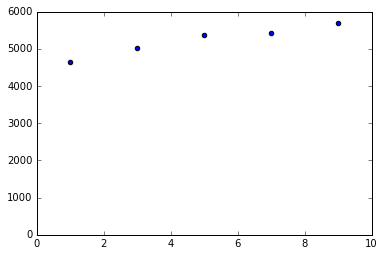

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

def knn_train_test_new(predictor, target, dataset, parameter):
    X = dataset[[predictor]]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    rmses = []
    for i in parameter:
        knn = KNeighborsRegressor(i)
        knn.fit(X_train, Y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    return rmses

l = [1, 3, 5, 7, 9]

r1 = knn_train_test_new('scaled_normalized_losses','price',subset1, l)
plt.scatter(l, r1)
plt.ylim([0,10000])
plt.show()

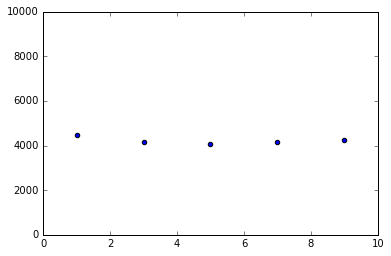

In [120]:
r1 = knn_train_test_new('scaled_horsepower','price',subset1, l)
plt.scatter(l, r1)
plt.ylim([0,10000])
plt.show()

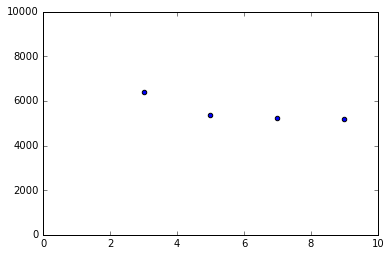

In [122]:
r1 = knn_train_test_new('symboling','price',subset1, l)
plt.scatter(l, r1)
plt.ylim([0,10000])
plt.show()

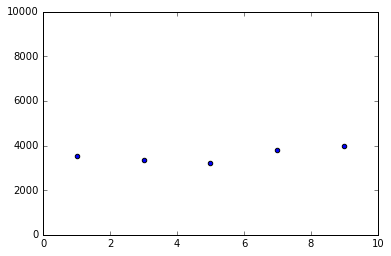

In [123]:
r1 = knn_train_test_new('scaled_engine_size','price',subset1, l)
plt.scatter(l, r1)
plt.ylim([0,10000])
plt.show()

Making the function work with more than 1 column - all features:

In [129]:
def knn_train_test_new_2(predictor, target, dataset):
    X = dataset[predictor]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

X = ['scaled_normalized_losses','scaled_horsepower','scaled_symboling','scaled_engine_size']
Y = ['price']

r1 = knn_train_test_new_2(X, Y, subset1)
print(r1)

4305.984379765895


Best 2 features:

In [130]:
def knn_train_test_new_2(predictor, target, dataset):
    X = dataset[predictor]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

X = ['scaled_horsepower','scaled_engine_size']
Y = ['price']

r1 = knn_train_test_new_2(X, Y, subset1)
print(r1)

3578.9376536180184


Best 3 features:

In [131]:
def knn_train_test_new_2(predictor, target, dataset):
    X = dataset[predictor]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

X = ['scaled_horsepower','scaled_engine_size', 'scaled_symboling']
Y = ['price']

r1 = knn_train_test_new_2(X, Y, subset1)
print(r1)

4014.0340112705026


Hyperparameter tuning - only scaled_horsepower:

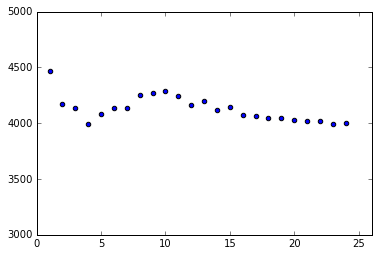

In [147]:
def knn_train_test_new_3(predictor, target, dataset, parameter):
    X = dataset[predictor]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    rmses = []
    for i in parameter:
        knn = KNeighborsRegressor(i)
        knn.fit(X_train, Y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    return rmses

l = list(range(1,25))
X = ['scaled_horsepower']
Y = ['price']

r1 = knn_train_test_new_3(X, Y, subset1, l)
plt.scatter(l, r1)
plt.ylim([3000,5000])
plt.xlim([0,26])
plt.show()

For the single variable model, it seems like a larger k is better.

Hyperparameter tuning - best 2 features:

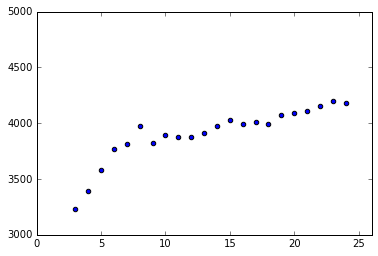

In [149]:
def knn_train_test_new_4(predictor, target, dataset, parameter):
    X = dataset[predictor]
    Y = dataset[target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    rmses = []
    for i in parameter:
        knn = KNeighborsRegressor(i)
        knn.fit(X_train, Y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    return rmses

l = list(range(1,25))
X = ['scaled_horsepower','scaled_engine_size']
Y = ['price']

r1 = knn_train_test_new_4(X, Y, subset1, l)
plt.scatter(l, r1)
plt.ylim([3000,5000])
plt.xlim([0,26])
plt.show()

For the best 2 model, it seems like a lower k is better.